In [1]:
import geopandas as gpd

from fracability import Entities
from fracability.operations.Geometry import center_object, tidy_intersections
from fracability.operations.Cleaners import connect_dots
from fracability.operations.Topology import nodes_conn
from fracability.operations.Statistics import NetworkFitter

ModuleNotFoundError: No module named 'pandas'

In [3]:
n_path = 'fracability/datasets/Fracture_network.shp'
b_path = 'fracability/datasets/Interpretation_boundary_laghettoSalza.shp'


fracs = gpd.read_file(n_path)

bound_gpd = gpd.read_file(b_path)

In [4]:
fractures = Entities.Fractures(fracs)

boundaries = Entities.Boundary(bound_gpd)

# clean_dup_points(fractures)

fracture_net = Entities.FractureNetwork()

fracture_net.add_fractures(fractures)

fracture_net.add_boundaries(boundaries)

In [5]:
center_object(fracture_net)


In [6]:
tidy_intersections(fracture_net)


Calculating intersections -\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-

In [7]:
connect_dots(fracture_net)


In [8]:
nodes_conn(fracture_net)


/home/gabriele/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


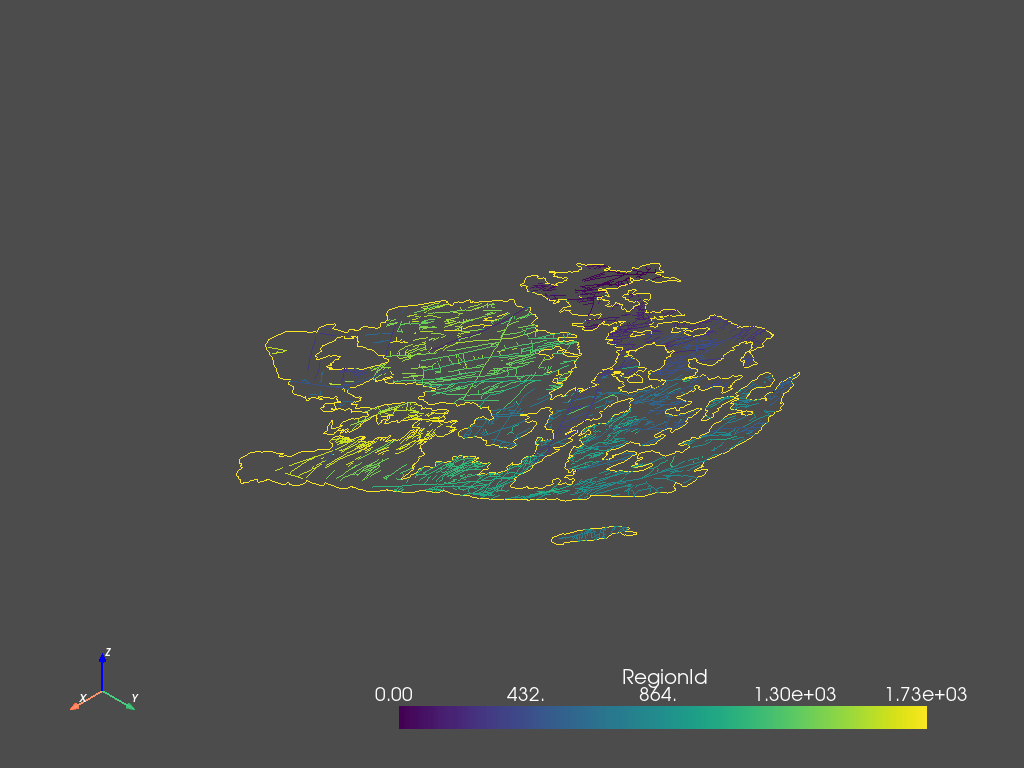

In [19]:
fracture_net.vtk_object.plot()

In [12]:
fitter = NetworkFitter(fracture_net)
fitter.fit('Fit_Lognormal_2P')


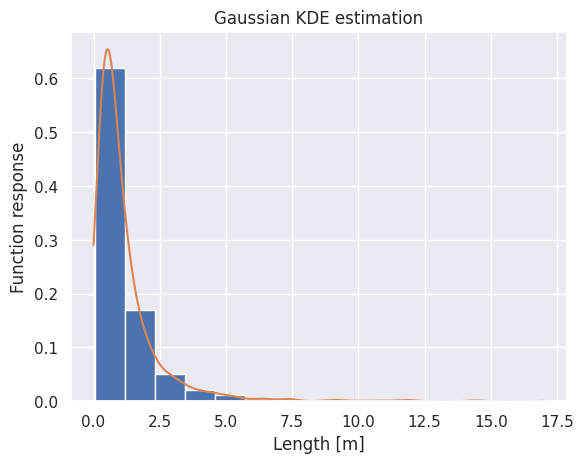

In [16]:
fitter.plot_kde()

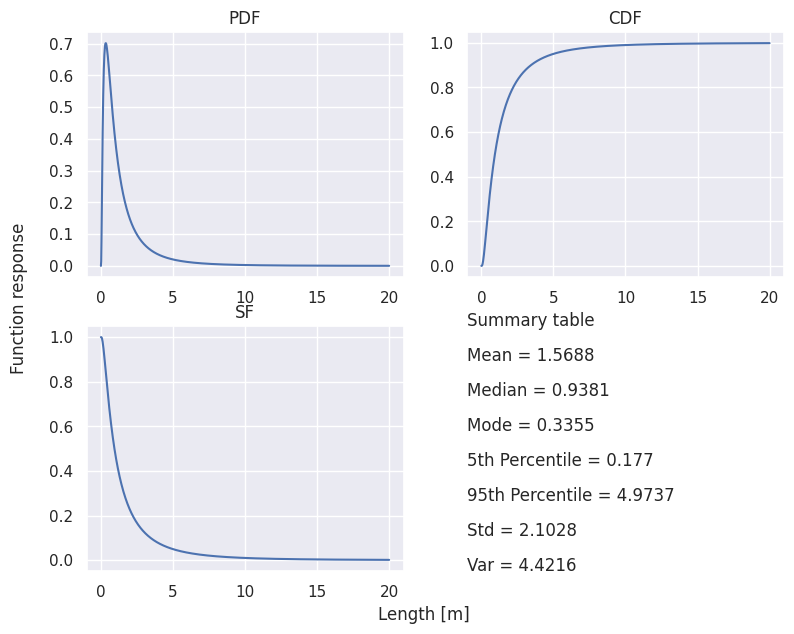

In [13]:
fitter.summary_plot(x_max=20)


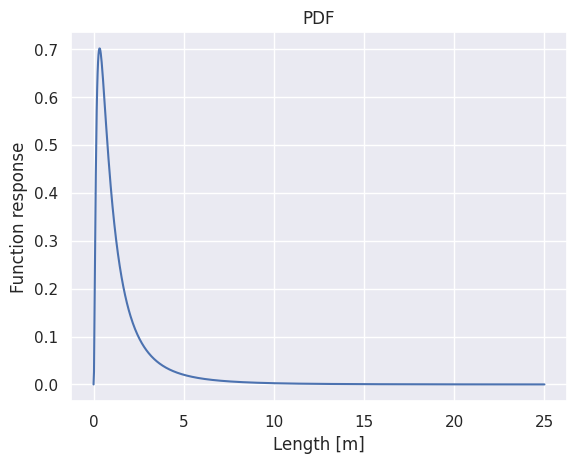

In [14]:
fitter.plot_function('PDF', x_max=25)
